In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None

## Loading and preparing data

In [2]:
c_dataset = pd.read_csv('car_dataset.csv', low_memory=False)
c_dataset.dropna(axis='columns', how='all', inplace=True)
print(c_dataset.shape)

(70823, 71)


Choosing columns that fit the project idea

In [3]:
cars_fc = c_dataset.dropna(subset=['mixed_fuel_consumption_per_100_km_l'])
cars_fc['boost_type'] = cars_fc['boost_type'].fillna('none')
cars_fc = cars_fc.dropna(axis='columns', thresh=4300)
cars_fc = cars_fc.loc[:, ['number_of_seats', 'length_mm',
       'width_mm', 'height_mm', 'wheelbase_mm', 'front_track_mm',
       'rear_track_mm', 'curb_weight_kg', 'maximum_torque_n_m',
       'injection_type', 'cylinder_layout', 'number_of_cylinders',
       'engine_type', 'valves_per_cylinder', 'turnover_of_maximum_torque_rpm', 'boost_type',
       'capacity_cm3', 'engine_hp', 'engine_hp_rpm', 'drive_wheels',
       'number_of_gears', 'mixed_fuel_consumption_per_100_km_l']]

cars_fc.head()

,number_of_seats,length_mm,width_mm,height_mm,wheelbase_mm,front_track_mm,rear_track_mm,curb_weight_kg,maximum_torque_n_m,injection_type,...,engine_type,valves_per_cylinder,turnover_of_maximum_torque_rpm,boost_type,capacity_cm3,engine_hp,engine_hp_rpm,drive_wheels,number_of_gears,mixed_fuel_consumption_per_100_km_l
2,2,4420.0,1870.0,1300.0,2472.0,1590.0,1570.0,1440.0,434,Multi-point fuel injection,...,Gasoline,2.0,3250.0,none,4942.0,260.0,5250.0,Rear wheel drive,4.0,8.0
9,4,4660.0,1890.0,1340.0,2720.0,1590.0,1570.0,1615.0,407,Injector,...,Gasoline,4.0,4000.0,none,3506.0,354.0,6500.0,Rear wheel drive,6.0,13.4
11,4,4660.0,1890.0,1340.0,2720.0,1590.0,1570.0,1615.0,427,Injector,...,Gasoline,4.0,4600.0,none,4601.0,326.0,5800.0,Rear wheel drive,5.0,12.2
12,2,4155.0,1745.0,1230.0,2285.0,1410.0,1485.0,1155.0,407,Injector,...,Gasoline,2.0,3200.0,none,4942.0,228.0,4000.0,Rear wheel drive,5.0,14.4
15,2,4115.0,1735.0,1245.0,2285.0,1420.0,1525.0,980.0,579,carburetor,...,Gasoline,2.0,4500.0,none,4942.0,370.0,5750.0,Rear wheel drive,5.0,15.7


In [4]:
cars_fc['boost_type'] = cars_fc['boost_type'].fillna('none')
cars_fc['boost_type'] = cars_fc['boost_type'].replace(['Twin-scroll', 'Turbine + compressor', 'Biturbo', 'compressor'], 'Turbo')

cars_fc = cars_fc.dropna()

cars_fc.value_counts(['boost_type'])

boost_type
none          3522
Turbo          606
Name: count, dtype: int64

One-hot encoding of the categorical data

In [5]:
cars_fc = cars_fc.convert_dtypes()
cars_fc = cars_fc.astype({'number_of_seats': 'int64', 'maximum_torque_n_m' : 'int64'})

cat_only_data = cars_fc.select_dtypes(include=['string[python]'])
cat_hot_one = pd.get_dummies(cat_only_data, drop_first=True)

cars_fc_h = cars_fc.drop(list(cat_only_data),axis=1)

cars_fc_h = pd.concat([cars_fc_h, cat_hot_one], axis=1)

cars_fc_target = cars_fc_h.loc[:, ['mixed_fuel_consumption_per_100_km_l']]
cars_fc_data = cars_fc_h.drop(['mixed_fuel_consumption_per_100_km_l'], axis='columns')

cars_fc_data.head()

,number_of_seats,length_mm,width_mm,height_mm,wheelbase_mm,front_track_mm,rear_track_mm,curb_weight_kg,maximum_torque_n_m,number_of_cylinders,...,cylinder_layout_Rotary-piston,cylinder_layout_V-type,cylinder_layout_W-type,engine_type_Gas,engine_type_Gasoline,engine_type_Hybrid,boost_type_none,drive_wheels_Four wheel drive (4WD),drive_wheels_Front wheel drive,drive_wheels_Rear wheel drive
2,2,4420,1870,1300,2472,1590,1570,1440,434,8,...,False,True,False,False,True,False,True,False,False,True
9,4,4660,1890,1340,2720,1590,1570,1615,407,8,...,False,True,False,False,True,False,True,False,False,True
11,4,4660,1890,1340,2720,1590,1570,1615,427,8,...,False,True,False,False,True,False,True,False,False,True
12,2,4155,1745,1230,2285,1410,1485,1155,407,8,...,False,True,False,False,True,False,True,False,False,True
15,2,4115,1735,1245,2285,1420,1525,980,579,8,...,False,True,False,False,True,False,True,False,False,True


In [6]:
cars_fc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 2 to 70778
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   number_of_seats                            4128 non-null   int64  
 1   length_mm                                  4128 non-null   Int64  
 2   width_mm                                   4128 non-null   Int64  
 3   height_mm                                  4128 non-null   Int64  
 4   wheelbase_mm                               4128 non-null   Int64  
 5   front_track_mm                             4128 non-null   Int64  
 6   rear_track_mm                              4128 non-null   Int64  
 7   curb_weight_kg                             4128 non-null   Int64  
 8   maximum_torque_n_m                         4128 non-null   int64  
 9   number_of_cylinders                        4128 non-null   Int64  
 10  valves_per_cylinder         

Saving prepared data to csv

In [5]:
cars_fc_h.to_csv('model_input.csv', index=False)

Additonal plots of fuel consumption in relation to every feature

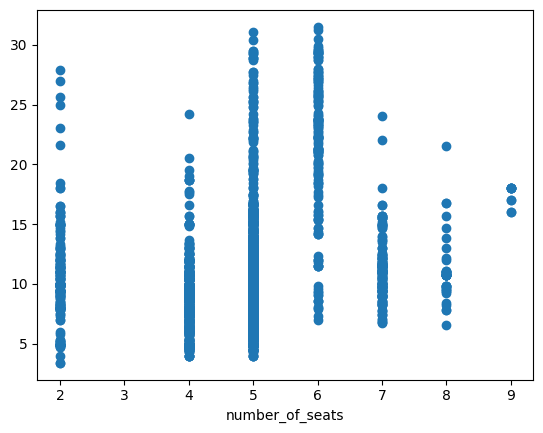

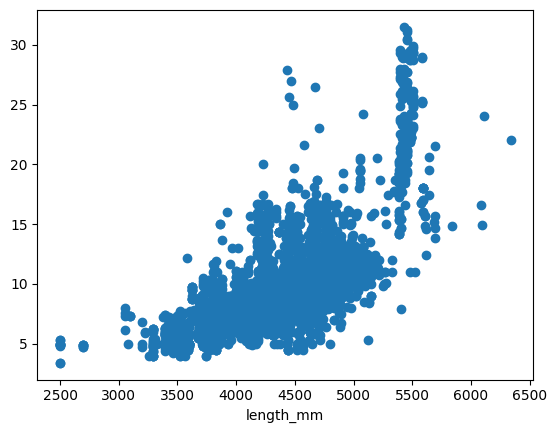

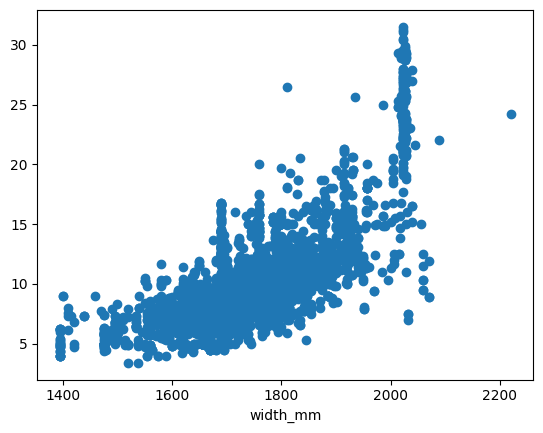

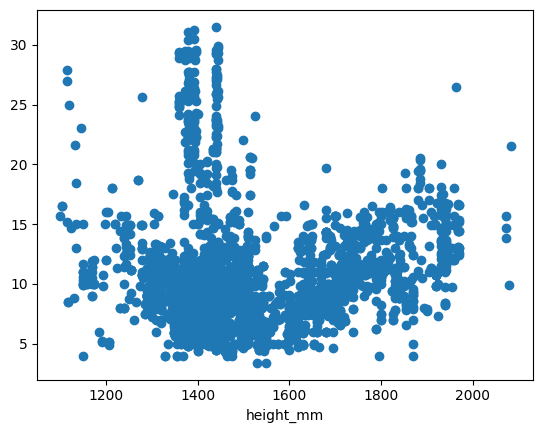

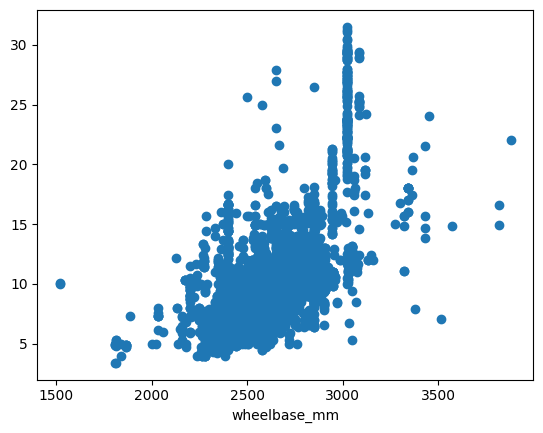

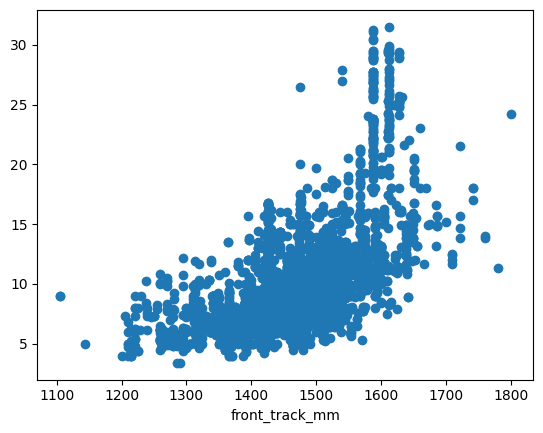

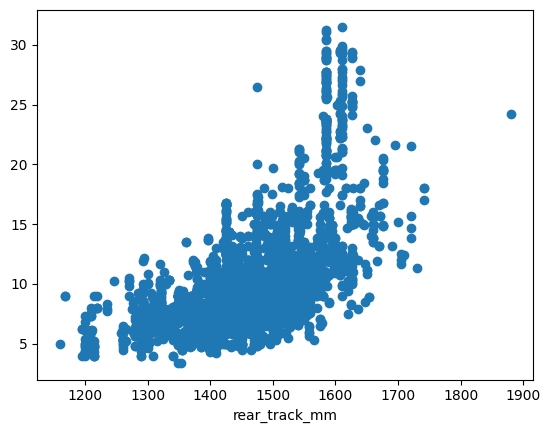

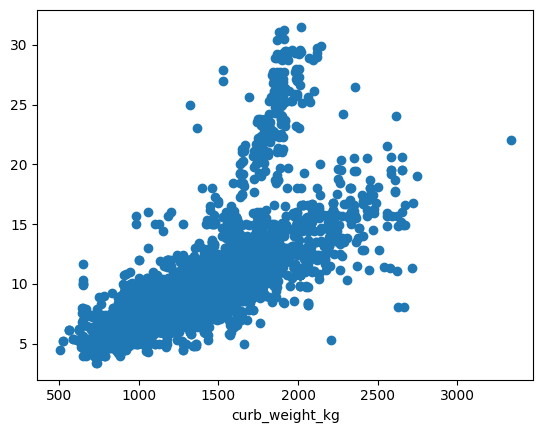

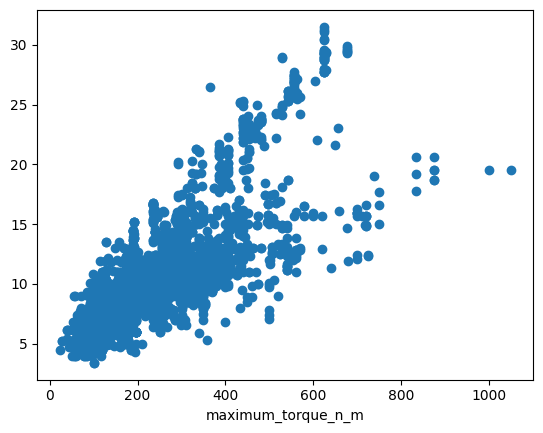

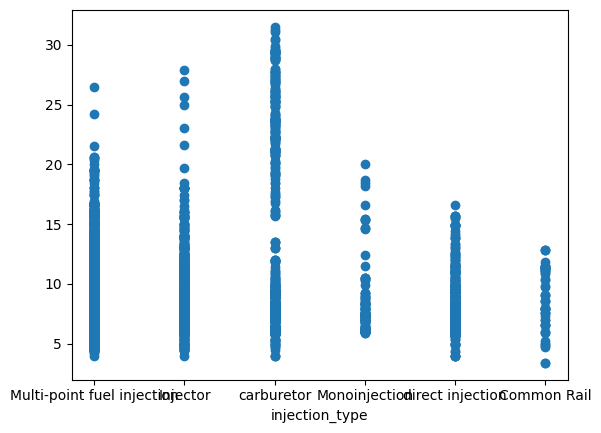

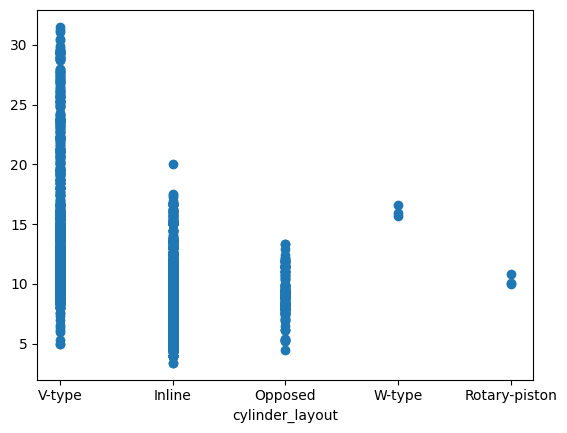

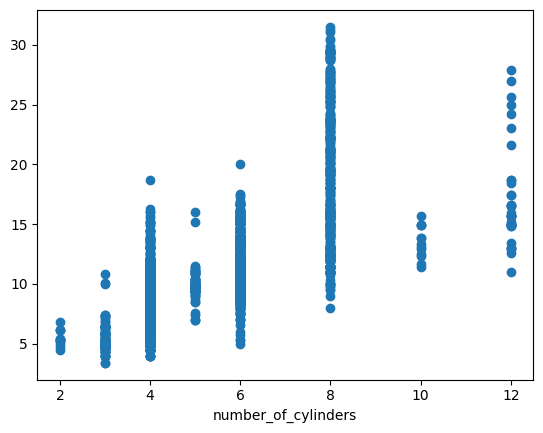

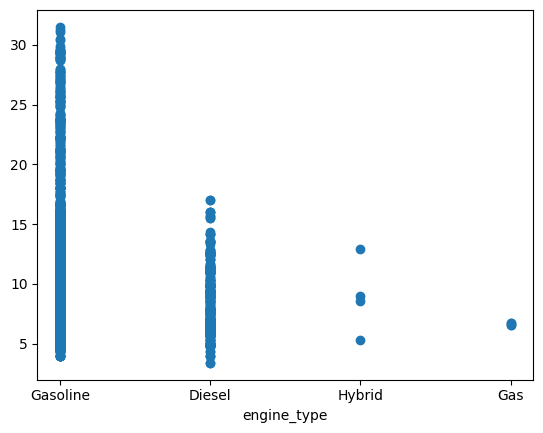

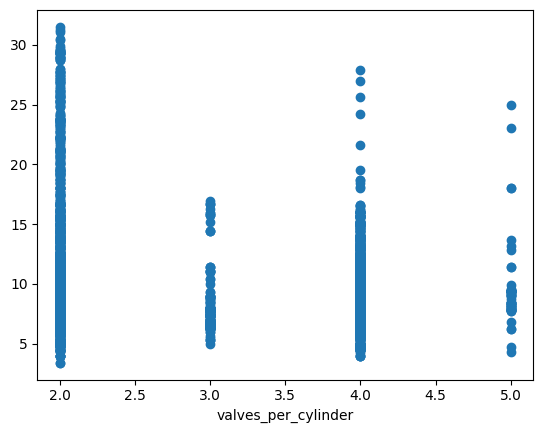

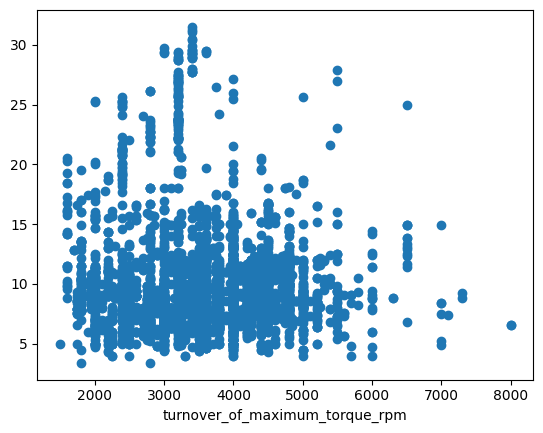

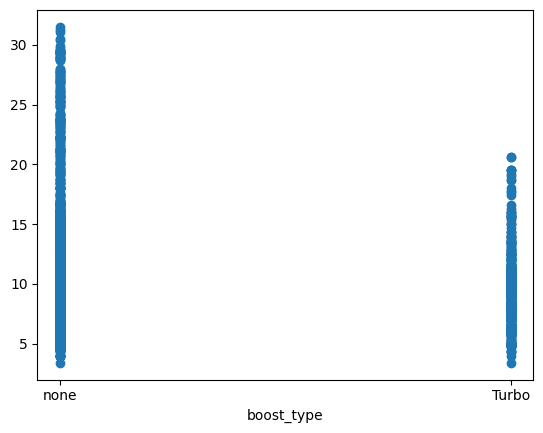

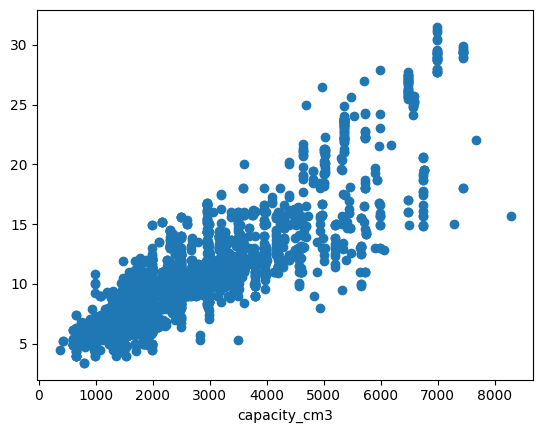

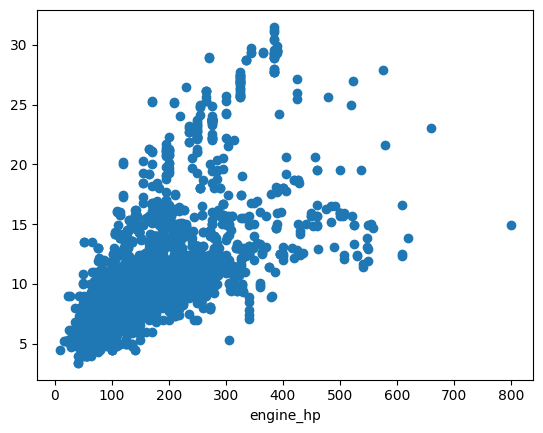

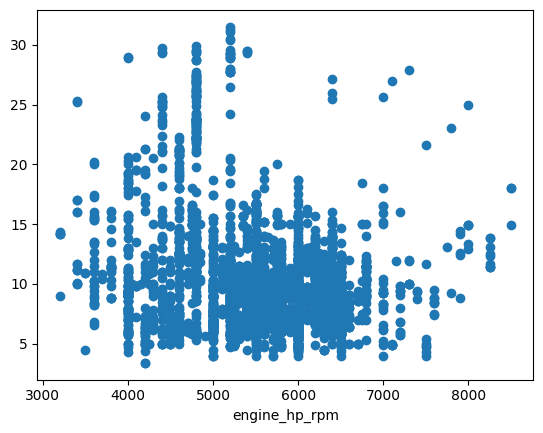

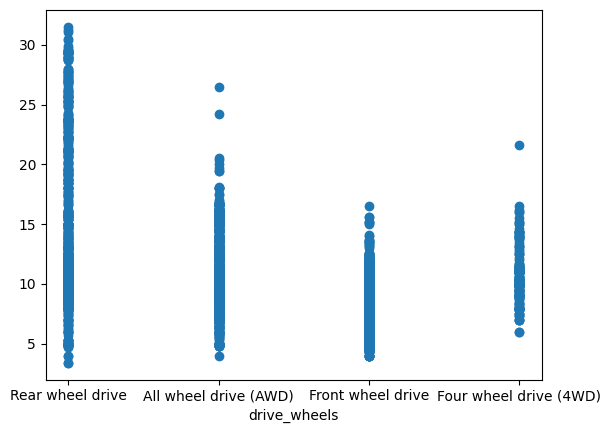

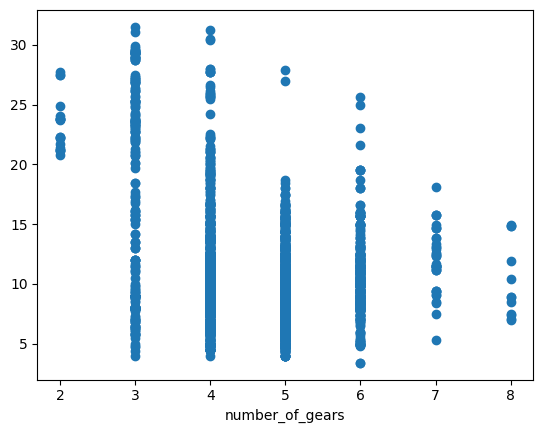

In [20]:
cars_plots = cars_fc.drop(['mixed_fuel_consumption_per_100_km_l'], axis='columns')
for column in cars_plots:
    plt.figure()
    plt.scatter(cars_plots[column], cars_fc_target)
    plt.xlabel(column)
    plt.show()